In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


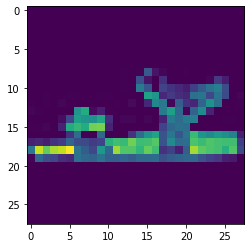

In [6]:
plt.imshow(x_train[59999])

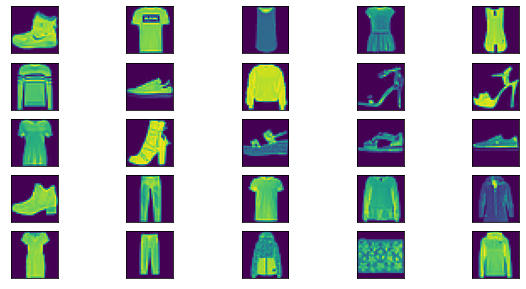

In [7]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show() 

# Image Processing - Convolution Neural Networks
# 1) Convolution Layer - Convolution reduces dimension size of image and also works on
# sharpness, brightness, blurrness, etc. of the images. It reduces size of image without
# loosing any trend or pattern. It applies a filter 3 X 3 for image reduction.
# Convolution Layer has an activation function preferrably "relu"
# First Convolution Layer must have input shape.
# Convolution Layer apply padding. Padding is input outer layer of zeros around the 
# image structure so that edge detection is done without error.

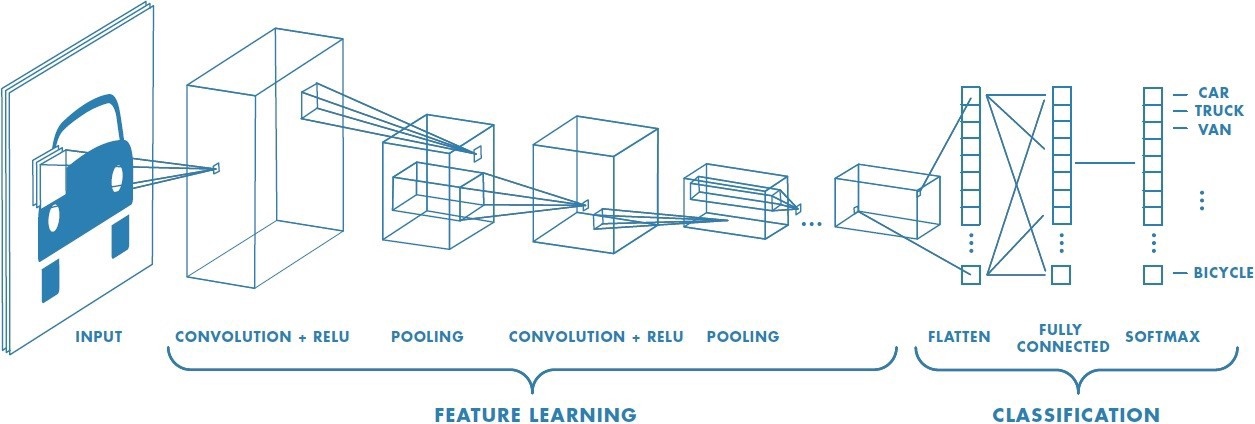

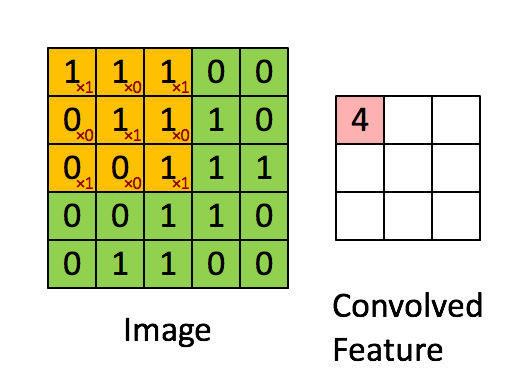

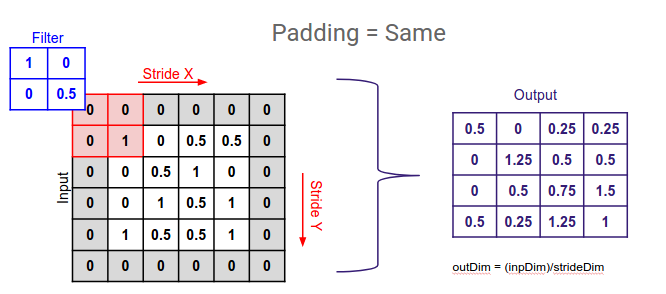

# Pooling Layer - Pooling Layer further reduces the dimension of image without loosing
# trend or pattern, and typical pooling layer will be 2 X 2.
# Max Pooling - Take maximum value in Quadrant
# Average Pooling - Calculate Average of all Values in Quadrant
# Most used in CNN is MaxPooling

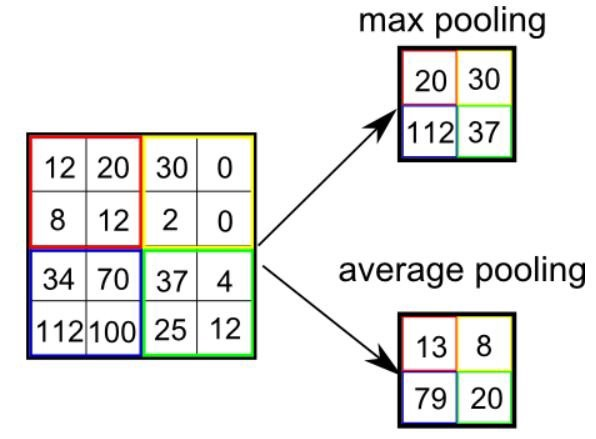

# Flatten the matrix data into a sigle vector which will be fed into the neural network or
# also called Fully Connected Layer

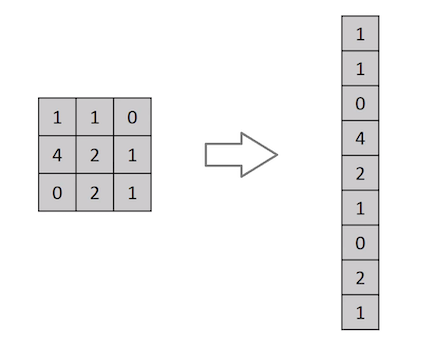

# Label	Description - 0	T-shirt/top, 1	Trouser, 2	Pullover, 3	Dress, 4	Coat, 5	Sandal
# 6	Shirt, 7	Sneaker, 8	Bag, 9	Ankle boot

In [8]:
# Image preprocessing - reshape, normalize, label endcode y.

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
x_train/=255
x_test/=255

In [11]:
y_train=tensorflow.keras.utils.to_categorical(y_train,10)
y_test=tensorflow.keras.utils.to_categorical(y_test,10)

In [12]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation

In [13]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(24,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 24)        6936      
                                                        

In [14]:
cnn.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 28s 34ms/step - loss: 0.5863 - accuracy: 0.7948 - val_loss: 0.4741 - val_accuracy: 0.8775
Epoch 2/20
469/469 [==============================] - 15s 33ms/step - loss: 0.3240 - accuracy: 0.8839 - val_loss: 0.2594 - val_accuracy: 0.9078
Epoch 3/20
469/469 [==============================] - 15s 33ms/step - loss: 0.2702 - accuracy: 0.9009 - val_loss: 0.2384 - val_accuracy: 0.9125
Epoch 4/20
469/469 [==============================] - 16s 34ms/step - loss: 0.2383 - accuracy: 0.9129 - val_loss: 0.2373 - val_accuracy: 0.9142
Epoch 5/20
469/469 [==============================] - 16s 35ms/step - loss: 0.2141 - accuracy: 0.9208 - val_loss: 0.2154 - val_accuracy: 0.9220
Epoch 6/20
469/469 [==============================] - 16s 33ms/step - loss: 0.1970 - accuracy: 0.9266 - val_loss: 0.2291 - val_accuracy: 0.9193
Epoch 7/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1812 - accuracy: 0.9322 - val_loss: 0.2067 - val_accuracy: